In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

C:\Users\MEDINA TECH\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\MEDINA TECH\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\MEDINA TECH\anaconda3\lib\site-packages\numpy\.libs\libopenblas.qvlo2t66wepi7jz63ps3hmohfey472bc.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
!nvidia-smi

Thu Jun  2 11:47:43 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 472.19       Driver Version: 472.19       CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   47C    P0    N/A /  N/A |     88MiB /  2048MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!pip install tensorflow-gpu

You should consider upgrading via the 'c:\users\medina tech\anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

In [5]:
IMAGE_SIZE = [299, 299]
TRAIN_PATH = 'E:/Official purpose/2022/Sprint11/Paddy/train'
VALIDATION_PATH = 'E:/Official purpose/2022/Sprint11/Paddy/validation',
TEST_IMAGE = 'E:/Official purpose/2021/Sprint - 26/Crop images/rice_blast_277780049_10219594816917165_8401548613579935188_n.jpg'

In [6]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [7]:
for layer in inception.layers:
    layer.trainable = False

In [8]:
folders = glob('E:/Official purpose/2022/Sprint11/Paddy/train/*')

In [9]:
flatten = Flatten()(inception.output)

In [10]:
bboxHead = Dense(128, activation="relu")(flatten)
bboxHead = Dense(64, activation="relu")(bboxHead)
bboxHead = Dense(32, activation="relu")(bboxHead)
bboxHead = Dense(len(folders), activation="softmax")(bboxHead)

In [11]:
model = Model(inputs=inception.input, outputs=bboxHead)

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [13]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
training_set = train_datagen.flow_from_directory('E:/Official purpose/2022/Sprint11/Paddy/train/',
                                                 target_size = (299, 299),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3108 images belonging to 6 classes.


In [16]:
validation_set = test_datagen.flow_from_directory('E:/Official purpose/2022/Sprint11/Paddy/validation/',
                                                 target_size = (299, 299),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 774 images belonging to 6 classes.


In [17]:
trained_model = model.fit(
  training_set,
  validation_data = validation_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation_set)
)

Epoch 1/50
98/98 [==============================] - 790s 8s/step - loss: 4.2831 - accuracy: 0.5059 - val_loss: 1.0825 - val_accuracy: 0.7791
Epoch 2/50
98/98 [==============================] - 652s 7s/step - loss: 0.5181 - accuracy: 0.8588 - val_loss: 0.4455 - val_accuracy: 0.8876
Epoch 3/50
98/98 [==============================] - 703s 7s/step - loss: 0.3236 - accuracy: 0.9119 - val_loss: 0.3710 - val_accuracy: 0.9134
Epoch 4/50
98/98 [==============================] - 580s 6s/step - loss: 0.1757 - accuracy: 0.9404 - val_loss: 0.2853 - val_accuracy: 0.9225
Epoch 5/50
98/98 [==============================] - 514s 5s/step - loss: 0.1533 - accuracy: 0.9532 - val_loss: 0.4286 - val_accuracy: 0.8928
Epoch 6/50
98/98 [==============================] - 480s 5s/step - loss: 0.1735 - accuracy: 0.9521 - val_loss: 0.3951 - val_accuracy: 0.9018
Epoch 7/50
98/98 [==============================] - 720s 7s/step - loss: 0.1971 - accuracy: 0.9466 - val_loss: 0.3686 - val_accuracy: 0.9186
Epoch 8/50
98

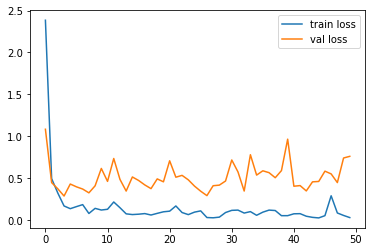

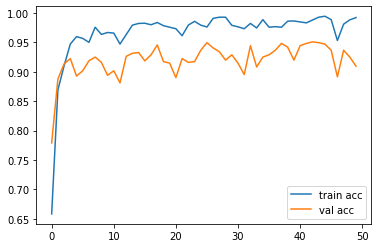

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(trained_model.history['loss'], label='train loss')
plt.plot(trained_model.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
plt.plot(trained_model.history['accuracy'], label='train acc')
plt.plot(trained_model.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
model.save('E:/Official purpose/2022/Sprint11/paddy_model_inception_s11.h5')

In [20]:
y_pred = model.predict(validation_set)

In [21]:
y_pred

array([[6.0528621e-19, 2.8899494e-08, 1.0000000e+00, 5.3556698e-19,
        1.8077233e-14, 3.7264095e-22],
       [4.6266657e-17, 1.0000000e+00, 1.1262342e-11, 1.5815502e-13,
        2.0245340e-11, 2.5985512e-19],
       [5.6840166e-10, 1.0000000e+00, 4.5848053e-10, 1.8288473e-14,
        3.9560334e-12, 8.5413849e-17],
       ...,
       [2.0340260e-17, 7.8236767e-17, 1.1559381e-16, 2.5072739e-17,
        5.3950947e-14, 1.0000000e+00],
       [9.9999499e-01, 1.8370551e-09, 2.8923433e-09, 4.3945420e-10,
        5.0457438e-06, 4.7999261e-11],
       [1.1919842e-10, 9.6566095e-11, 2.5669117e-10, 9.9997854e-01,
        2.1441349e-05, 2.5286215e-16]], dtype=float32)

In [22]:
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([2, 1, 1, 3, 0, 2, 3, 5, 3, 3, 1, 1, 4, 3, 1, 1, 1, 4, 1, 2, 3, 0,
       5, 2, 1, 2, 3, 5, 4, 3, 1, 5, 0, 1, 4, 5, 1, 1, 3, 1, 3, 3, 3, 2,
       4, 4, 1, 5, 0, 2, 5, 0, 5, 1, 0, 2, 4, 3, 4, 4, 5, 3, 5, 3, 2, 4,
       3, 4, 1, 0, 5, 2, 4, 0, 1, 4, 3, 3, 1, 4, 5, 3, 2, 1, 4, 4, 3, 5,
       3, 3, 4, 1, 2, 2, 1, 2, 5, 1, 5, 1, 0, 1, 1, 5, 5, 1, 1, 0, 5, 4,
       3, 2, 5, 3, 2, 1, 5, 4, 3, 4, 5, 0, 2, 2, 2, 1, 3, 3, 4, 2, 4, 0,
       1, 3, 5, 2, 2, 5, 5, 4, 4, 0, 5, 0, 2, 5, 0, 4, 1, 3, 1, 1, 2, 5,
       1, 3, 4, 1, 0, 2, 1, 5, 2, 0, 4, 4, 4, 4, 0, 2, 2, 1, 4, 2, 4, 1,
       0, 4, 4, 4, 1, 2, 0, 1, 2, 0, 4, 1, 0, 0, 0, 4, 5, 1, 0, 0, 5, 1,
       0, 0, 4, 0, 4, 0, 0, 3, 1, 0, 0, 0, 2, 1, 4, 0, 0, 1, 5, 2, 2, 5,
       0, 1, 5, 0, 3, 5, 2, 1, 4, 4, 0, 1, 5, 4, 5, 1, 4, 5, 1, 5, 4, 3,
       1, 1, 3, 1, 4, 0, 3, 2, 2, 5, 2, 0, 5, 5, 4, 2, 5, 3, 4, 1, 0, 2,
       0, 2, 4, 0, 1, 2, 0, 0, 0, 3, 0, 0, 2, 2, 4, 3, 2, 1, 1, 5, 1, 4,
       4, 3, 2, 4, 2, 2, 4, 2, 3, 0, 1, 3, 1, 3, 4,

In [24]:
from tensorflow.keras.models import load_model
model=load_model('E:/Official purpose/2022/Sprint11/paddy_model_inception_s11.h5')

In [25]:
img=image.load_img(TEST_IMAGE, target_size=(299, 299))

In [26]:
img_arr=image.img_to_array(img)
img_arr

array([[[238., 219., 127.],
        [238., 219., 127.],
        [238., 219., 127.],
        ...,
        [245., 220., 127.],
        [245., 220., 127.],
        [245., 220., 127.]],

       [[243., 215., 115.],
        [243., 215., 115.],
        [241., 213., 113.],
        ...,
        [255., 219., 114.],
        [255., 219., 114.],
        [255., 219., 114.]],

       [[237., 215.,  95.],
        [235., 213.,  93.],
        [234., 212.,  92.],
        ...,
        [253., 224.,  96.],
        [253., 224.,  96.],
        [254., 225.,  97.]],

       ...,

       [[200., 159.,  95.],
        [205., 165.,  96.],
        [205., 164., 100.],
        ...,
        [ 51.,  39.,  15.],
        [ 65.,  49.,  24.],
        [ 76.,  58.,  34.]],

       [[188., 148.,  96.],
        [199., 160., 101.],
        [208., 169., 110.],
        ...,
        [ 64.,  47.,  21.],
        [ 73.,  53.,  26.],
        [ 93.,  69.,  41.]],

       [[167., 129.,  92.],
        [199., 162., 117.],
        [210., 1

In [27]:
img_arr.shape

(299, 299, 3)

In [28]:
img_arr=img_arr/255

In [29]:
img_arr=np.expand_dims(img_arr,axis=0)
img_data=preprocess_input(img_arr)
img_data.shape

(1, 299, 299, 3)

In [30]:
pred = model.predict(img_data)
print(pred)

[[3.93309801e-06 2.65912153e-02 9.47834373e-01 1.47372680e-02
  1.01054795e-02 7.27757229e-04]]


In [31]:
classes = np.array(['Blast', 'FalseSmut', 'RiceBug', 'SheathRot', 'StemBorer', 'unrelated_image'])
top_2 = np.argsort(pred[0])[:-3:-1]
for i in range(2):
    print("{}".format(classes[top_2[i]])+" ({:.5})".format(pred[0][top_2[i]]))
print(pred)
itemindex = np.where(pred == np.max(pred))
print("probability:" + str(np.max(pred)) + "\n" + classes[itemindex[1][0]])

RiceBug (0.94783)
FalseSmut (0.026591)
[[3.93309801e-06 2.65912153e-02 9.47834373e-01 1.47372680e-02
  1.01054795e-02 7.27757229e-04]]
probability:0.9478344
RiceBug


FalseSmut (0.9988)
unrelated_image (0.0011975)
[[2.9784752e-07 9.9880064e-01 5.2915100e-10 8.7068628e-08 1.4182785e-06
  1.1974717e-03]]
probability:0.99880064
FalseSmut


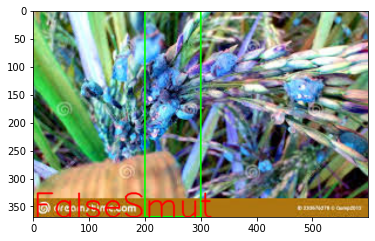

-1

In [110]:
import cv2, imutils
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import preprocess_input
import matplotlib.pyplot as plt
model = load_model('E:/Official purpose/2022/Sprint11/paddy_model_inception_s11.h5')
TEST_IMAGE = 'E:/Official purpose/2021/Sprint - 26/Crop images/rice_false_smut22.jpg'
img=image.load_img(TEST_IMAGE,target_size=(299, 299))
img_arr=image.img_to_array(img)
img_arr
img_arr.shape
img_arr=img_arr/255
img_arr=np.expand_dims(img_arr,axis=0)
#img_data=preprocess_input(img_arr)
pred = model.predict(img_arr)
classes = np.array(['Blast', 'FalseSmut', 'RiceBug', 'SheathRot', 'StemBorer', 'unrelated_image'])
top_2 = np.argsort(pred[0])[:-3:-1]
for i in range(2):
    print("{}".format(classes[top_2[i]])+" ({:.5})".format(pred[0][top_2[i]]))
print(pred)
itemindex = np.where(pred == np.max(pred))
print("probability:" + str(np.max(pred)) + "\n" + classes[itemindex[1][0]])
(startX, startY, endX, endY) = pred[:, 0], pred[:, 1], pred[:, 2], pred[:, 3]
test_image = cv2.imread(TEST_IMAGE)
test_image = imutils.resize(test_image, width=600)
(h, w) = test_image.shape[:2]
startX = int(startX * w)
startY = int(startY * h)
endX = int(endX * w)
endY = int(endY * h)
output = cv2.rectangle(test_image, (startX+300, startY), (endX+200, endY), (0, 255, 0), 2)
output = cv2.putText(test_image, classes[itemindex[1][0]], (startX, startY), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 2, cv2.LINE_AA)
cv2.imshow("Output", test_image)
cv2.imwrite('E:/Official purpose/2022/Sprint11/paddy_symptom_detection/result.jpg', test_image)
plt.imshow(output)
plt.show()
cv2.waitKey(0)